

# Project: Investigate a Dataset - [European Football Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>I will be performing an analysis on the European Football dataset gotten from [Kaggle](https://www.kaggle.com/hugomathien/soccer), this data set contains match information about 25979 games, players, and teams from several European countries from 2008 to 2016.

### Some of the questions that will be answered through the analysis of this dataset include:

> What is the most likely occurence in a game between(Home win, away win or draw)?

> What teams have had the most wins  over the time period? 

> What is the average goal scored per game in the european leagues?

> Which teams conceeded the most goals within the period ?

> Which of the top five european leagues is the most competitive?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will be making observations about the dataset
by performing operations to view available files, note features present in each file,
inspect data types and look for instances of missing and duplicate data.

In [5]:
# Get file names from directory
import os
def fn():       
    file_list=os.listdir(r"Database_Soccer/")
    print (file_list)
fn()

['Match.csv', 'Player_Attributes.csv', 'Country.csv', 'Team_Attributes.csv', 'sqlite_sequence.csv', 'Player.csv', 'Team.csv', 'League.csv']


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.2

In [2]:
# Access the various dataframes 
match_df = pd.read_csv('Database_Soccer/Match.csv')
player_df = pd.read_csv('Database_Soccer/Player.csv')
player_att_df = pd.read_csv('Database_Soccer/Player_Attributes.csv')
country_df = pd.read_csv('Database_Soccer/Country.csv')
team_df = pd.read_csv('Database_Soccer/Team.csv')
team_att_df = pd.read_csv('Database_Soccer/Team_Attributes.csv')
seq_df = pd.read_csv('Database_Soccer/sqlite_sequence.csv')
league_df = pd.read_csv('Database_Soccer/League.csv')

**Match**

In [7]:
match_df.shape

(25979, 115)

In [8]:
match_df.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [9]:
# Check data types 
match_df.dtypes

id                    int64
country_id            int64
league_id             int64
season               object
stage                 int64
date                 object
match_api_id          int64
home_team_api_id      int64
away_team_api_id      int64
home_team_goal        int64
away_team_goal        int64
home_player_X1      float64
home_player_X2      float64
home_player_X3      float64
home_player_X4      float64
home_player_X5      float64
home_player_X6      float64
home_player_X7      float64
home_player_X8      float64
home_player_X9      float64
home_player_X10     float64
home_player_X11     float64
away_player_X1      float64
away_player_X2      float64
away_player_X3      float64
away_player_X4      float64
away_player_X5      float64
away_player_X6      float64
away_player_X7      float64
away_player_X8      float64
                     ...   
B365H               float64
B365D               float64
B365A               float64
BWH                 float64
BWD                 

In [10]:
#View available columns in the match dataframe
cols = match_df.columns
print(*cols)

id country_id league_id season stage date match_api_id home_team_api_id away_team_api_id home_team_goal away_team_goal home_player_X1 home_player_X2 home_player_X3 home_player_X4 home_player_X5 home_player_X6 home_player_X7 home_player_X8 home_player_X9 home_player_X10 home_player_X11 away_player_X1 away_player_X2 away_player_X3 away_player_X4 away_player_X5 away_player_X6 away_player_X7 away_player_X8 away_player_X9 away_player_X10 away_player_X11 home_player_Y1 home_player_Y2 home_player_Y3 home_player_Y4 home_player_Y5 home_player_Y6 home_player_Y7 home_player_Y8 home_player_Y9 home_player_Y10 home_player_Y11 away_player_Y1 away_player_Y2 away_player_Y3 away_player_Y4 away_player_Y5 away_player_Y6 away_player_Y7 away_player_Y8 away_player_Y9 away_player_Y10 away_player_Y11 home_player_1 home_player_2 home_player_3 home_player_4 home_player_5 home_player_6 home_player_7 home_player_8 home_player_9 home_player_10 home_player_11 away_player_1 away_player_2 away_player_3 away_player_4 a

In [4]:
# check for null rows
match_df.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

In [12]:
def perc_miss(df):
    '''Return sorted dataframe showing percentage of missing values in given data'''
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    
    missing_value_df.sort_values('percent_missing',ascending= False, inplace=True)
    
    return missing_value_df

In [13]:
# Percentage of missing rows in match data
perc_miss(match_df)

,column_name,percent_missing
PSD,PSD,57.011432
PSA,PSA,57.011432
PSH,PSH,57.011432
BSA,BSA,45.490589
BSH,BSH,45.490589
BSD,BSD,45.490589
GBA,GBA,45.486739
GBD,GBD,45.486739
GBH,GBH,45.486739
shotoff,shotoff,45.275030


In [14]:
# count of duplicate
match_df.duplicated().sum()

0

In [15]:
# count of match weeks
match_df['stage'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34,  4,  5,  6,  7,  8,  9,
       35, 36, 37, 38])

**Players**

In [16]:
# view first rows
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [17]:
# dataframe info
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [18]:
# count of duplicates
player_df.duplicated().sum()

0

**Player Attributes**

In [19]:
# view first rows
player_att_df.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [20]:
# view dataframe info
player_att_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [21]:
# count duplicate rows
player_att_df.duplicated().sum()

0

**Country**

In [22]:
# view first rows
country_df.head(3)

,id,name
0,1,Belgium
1,1729,England
2,4769,France


In [23]:
# view dataframe info
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [24]:
# count duplicate rows
country_df.duplicated().sum()

0

**Team attributes**

In [25]:
# view first rows
team_att_df.head(3)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [26]:
# view info
team_att_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [27]:
# count rows
team_att_df.duplicated().sum()

0

**Team**

In [28]:
# view first rows
team_df.head(3)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


In [29]:
# view data info
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


**League**

In [30]:
# First 3 rows
league_df.head(3)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1


In [31]:
# show data info
league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [32]:
# count duplicates
league_df.duplicated().sum()

0


### Data Cleaning
> I am going only keep the necessary columns and dataframes required to answer the questions posed earlier on, the columns containing key match information will be kept and then joined with other data on related keys to create a single combined dataframe

In [33]:
# Filter match data and keep columns relevant to questions posed
match_df = match_df.filter(items=['id','country_id','league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal'])


In [34]:
# Create result column that contains three possible values home_win, away_win or draw

# create a list of our conditions
conditions = [
    (match_df['home_team_goal'] > match_df['away_team_goal']),
    (match_df['home_team_goal'] < match_df['away_team_goal']),
    (match_df['home_team_goal'] == match_df['away_team_goal']),
    ]

# create a list of the values we want to assign for each condition
values = ['home_win', 'away_win', 'draw']

# create a new column and use np.select to assign values to it using our lists as arguments
match_df['result'] = np.select(conditions, values)

# display updated DataFrame
match_df.head()


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,draw
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,draw
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,away_win
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,home_win
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,away_win


In [35]:
# combine datasets to get country, league, club names

# combine match and team
df_combined = match_df.merge(team_df, left_on='home_team_api_id', right_on='team_api_id', how='left').rename(columns={"team_long_name": "home_team"})
df_combined =df_combined.filter(items = ['id','country_id','league_id','season','stage','date','match_api_id','home_team','away_team_api_id','home_team_goal','away_team_goal','result'])
df_combined = df_combined.merge(team_df, left_on='away_team_api_id', right_on='team_api_id', how='left').rename(columns={"team_long_name": "away_team"})
df_combined = df_combined.filter(items = ['id','country_id','league_id','season','stage','date','match_api_id','home_team','away_team','home_team_goal','away_team_goal','result'])
df_combined.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team,away_team,home_team_goal,away_team_goal,result
0,2,1,1,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,1,1,draw
1,4,1,1,2008/2009,1,2008-08-16 00:00:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,draw
2,6,1,1,2008/2009,1,2008-08-16 00:00:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,away_win


In [36]:
# combine with league info
df_combined = df_combined.merge(league_df, left_on='league_id', right_on='id', how='left',suffixes=('_left', '_right')).rename(columns={"name": "league"})
df_combined.head(3)

,id_left,country_id_left,league_id,season,stage,date,match_api_id,home_team,away_team,home_team_goal,away_team_goal,result,id_right,country_id_right,league
0,2,1,1,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,1,1,draw,1,1,Belgium Jupiler League
1,4,1,1,2008/2009,1,2008-08-16 00:00:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,draw,1,1,Belgium Jupiler League
2,6,1,1,2008/2009,1,2008-08-16 00:00:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,away_win,1,1,Belgium Jupiler League


In [37]:
#combine with country

df_combined = df_combined.merge(country_df, left_on='country_id_left', right_on='id', how='left').rename(columns={"name": "country"})
df_combined = df_combined.filter(items = ['country','league','season','stage','date','match_api_id','home_team','away_team','home_team_goal','away_team_goal','result'])
df_combined.head(3)

,country,league,season,stage,date,match_api_id,home_team,away_team,home_team_goal,away_team_goal,result
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,1,1,draw
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,draw
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,away_win


In [38]:
# Get points home and away
#for home points if result is equals to draw then 1, if result is equal to home win then 3, if result is awaywin then 0
#for away points  if result is equals to draw then 1, if result is equal to away win then 3, if result is homewin then 0

# create a list of our conditions
conditions = [
    (df_combined['result'] == 'draw'),
    (df_combined['result'] == 'home_win'),
    (df_combined['result'] == 'away_win')
    ]

conditions_away = [
    (df_combined['result'] == 'draw'),
    (df_combined['result'] == 'home_win'),
    (df_combined['result'] == 'away_win')
    ]

# create a list of the values we want to assign for each condition
values = [1, 3, 0]
values_2 = [1,0,3]

# create a new column and use np.select to assign values to it using our lists as arguments
df_combined['home_points'] = np.select(conditions, values)
df_combined['away_points'] = np.select(conditions_away, values_2)

# display updated DataFrame
df_combined.head()

,country,league,season,stage,date,match_api_id,home_team,away_team,home_team_goal,away_team_goal,result,home_points,away_points
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,1,1,draw,1,1
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,draw,1,1
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,away_win,0,3
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492476,KAA Gent,RAEC Mons,5,0,home_win,3,0
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492477,FCV Dender EH,Standard de Liège,1,3,away_win,0,3


In [39]:
def make_table(league,season):
    '''Function that returns league table for a season
    Input string - league(name of league in ""),season(season in "")
    Output  df- league table with club, points, gf, ga, gd
    '''
    # Group by league and season
    league_year = df_combined.query('league == @league & season == @season')
    # Get team's home points
    home_points = league_year.groupby('home_team')['home_points'].sum().reset_index()
    home_points = pd.DataFrame(data= home_points)
    # Get team's away points
    away_points = league_year.groupby('away_team')['away_points'].sum().reset_index()
    away_points = pd.DataFrame(data= away_points)
    # Get total points
    points = home_points.merge(away_points, left_on='home_team', right_on='away_team', how='left').rename(columns={"home_team": "team_points"})
    points['points'] = points['home_points'] + points['away_points']
    points = points.filter(['team_points','points'])

    # get goals scored
    home_goals = league_year.groupby('home_team')['home_team_goal'].sum().reset_index()
    home_goals =  pd.DataFrame(data= home_goals)

    away_goals = league_year.groupby('away_team')['away_team_goal'].sum().reset_index()
    away_goals =  pd.DataFrame(data= away_goals)
    # Get total goals
    goals_for = home_goals.merge(away_goals, left_on='home_team', right_on='away_team', how='left').rename(columns={"home_team": "team_gf"})
    goals_for['gf'] = goals_for['home_team_goal'] + goals_for['away_team_goal']
    goals_for = goals_for.filter(['team_gf','gf'])

    # get goals conceeded home and away
    conceed_home = league_year.groupby('home_team')['away_team_goal'].sum().reset_index()
    conceed_home =  pd.DataFrame(data= conceed_home)

    conceed_away = league_year.groupby('away_team')['home_team_goal'].sum().reset_index()
    conceed_away =  pd.DataFrame(data= conceed_away)

    # join conceeded goals dfs
    goals_against = conceed_home.merge(conceed_away, left_on='home_team', right_on='away_team', how='left').rename(columns={"home_team": "team_ga"})
    # get total conceeded
    goals_against['ga'] = goals_against['away_team_goal'] + goals_against['home_team_goal']
    goals_against = goals_against.filter(['team_ga','ga'])

    # join all goals and get goal difference
    goals = goals_against.merge(goals_for, left_on='team_ga', right_on='team_gf', how='left')
    goals['gd'] = goals['gf'] - goals['ga']
    
    # Combine all and get the table
    table = points.merge(goals, left_on='team_points', right_on='team_ga', how='left').sort_values(['points', 'gd'],ascending = [False, False]).rename(columns={"team_points": "club"})
    table = table.filter(['club','points','gf','ga','gd']).reset_index(drop=True)
    # Make index start at one
    table.index = table.index + 1                     

    return table

<a id='eda'></a>
## Exploratory Data Analysis

### What is the most likely occurence in a game between(Home win, away win or draw) ?

In [40]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
game_results = df_combined['result'].value_counts()* 100 / len(df_combined)
game_results = game_results.rename_axis('Match outcome').reset_index()
game_results = pd.DataFrame(data= game_results)
game_results

,Match outcome,result
0,home_win,45.871666
1,away_win,28.738597
2,draw,25.389738


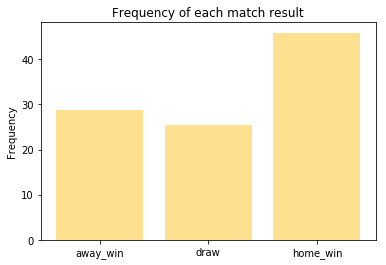

In [41]:
plt.bar(x = game_results['Match outcome'],
        # using the data from the game results
        height = game_results['result'], 
        # aligned in the center
        align='center',
        # with color
        color='#FFC222',
        # alpha 0.5
        alpha=0.5)
plt.title('Frequency of each match result')
plt.ylabel('Frequency')
plt.show()

> The most frequent occurence is a home win 45.87% , followed by an away win 28.7, and finally the least frequent is a draw with 25.39%

### What teams have had the most wins over the time period?

In [42]:
# Get home and away wins for clubs 
home_res = df_combined.filter(items=['home_team','result'])
home_res = home_res.query('result == "home_win"')
home_res = home_res.groupby('home_team').count().rename_axis('home_team').rename(columns={"result": "home_wins"}).reset_index()
home_res=pd.DataFrame(data= home_res)


away_res = df_combined.filter(items=['away_team','result'])
away_res = away_res.query('result == "away_win"')
away_res = away_res.groupby('away_team').count().rename_axis('away_team').rename(columns={"result": "away_wins"}).reset_index()
away_res=pd.DataFrame(data= away_res)



club_res = home_res.merge(away_res, left_on='home_team', right_on='away_team', how='left').rename(columns={"home_team": "team"})
club_res= club_res.filter(items =['team','home_wins','away_wins'])
club_res['wins'] = club_res['home_wins'] + club_res['away_wins']
club_res.sort_values('wins',ascending= False, inplace=True)

In [43]:
# View top ten clubs by wins
club_res.head(10)

,team,home_wins,away_wins,wins
75,FC Barcelona,131,103,234
211,Real Madrid CF,129,99,228
49,Celtic,120,98,218
77,FC Bayern Munich,109,84,193
162,Manchester United,116,76,192
133,Juventus,105,84,189
232,SL Benfica,102,83,185
89,FC Porto,102,81,183
15,Ajax,103,78,181
76,FC Basel,103,77,180


> **Fc Barcelona** of Spain had the most wins during the period with **234** wins, closely followed by their league rivals **Real Madrid** with **228** wins

### What is the average goal scored per game in the european leagues?


In [44]:
# View available leagues
league_df['name']

0       Belgium Jupiler League
1       England Premier League
2               France Ligue 1
3        Germany 1. Bundesliga
4                Italy Serie A
5       Netherlands Eredivisie
6           Poland Ekstraklasa
7     Portugal Liga ZON Sagres
8      Scotland Premier League
9              Spain LIGA BBVA
10    Switzerland Super League
Name: name, dtype: object

In [45]:
# Avg goals scored per game
avg_goals= df_combined.filter(items = ['league','home_team_goal','away_team_goal'])
avg_goals['goals'] = avg_goals['home_team_goal'] + avg_goals['away_team_goal']
avg_goals = avg_goals.groupby('league')['goals'].mean().rename_axis('league').reset_index()
games = df_combined.groupby('league')['match_api_id'].count().rename_axis('league').reset_index()

avg_goals = pd.DataFrame(data= avg_goals)

games = df_combined.groupby('league')['match_api_id'].count().rename_axis('league').reset_index()

combined = avg_goals.merge(games, left_on='league', right_on='league', how='left').rename(columns={"league": "League","match_api_id": "games"})

combined.sort_values('goals',ascending= False, inplace=True)
combined.head(10)

,League,goals,games
5,Netherlands Eredivisie,3.080882,2448
10,Switzerland Super League,2.929677,1422
3,Germany 1. Bundesliga,2.901552,2448
0,Belgium Jupiler League,2.801505,1728
9,Spain LIGA BBVA,2.767105,3040
1,England Premier League,2.710526,3040
8,Scotland Premier League,2.633772,1824
4,Italy Serie A,2.616838,3017
7,Portugal Liga ZON Sagres,2.534600,2052
2,France Ligue 1,2.443092,3040


>  The Eredivisie has the highest number of goals per game with 3.08 goals on average over 2448 games, followed by the Switzerland Super League with 2.9 goals on average in 1422 games

### Which teams conceeded the most goals over the period?

In [46]:
df_combined.head(3)

,country,league,season,stage,date,match_api_id,home_team,away_team,home_team_goal,away_team_goal,result,home_points,away_points
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,1,1,draw,1,1
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,draw,1,1
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,away_win,0,3


In [47]:
# Get goals conceeded at home and away
conceeded_at_home = df_combined.groupby('home_team')['away_team_goal'].sum().rename_axis('home_team').reset_index()
conceeded_at_home = pd.DataFrame(data= conceeded_at_home) 

conceeded_at_away= df_combined.groupby('away_team')['home_team_goal'].sum().rename_axis('away_team').reset_index()
conceeded_at_away = pd.DataFrame(data= conceeded_at_away)

In [48]:
# combine goals conceeded at home and way to get goals against

goals_against = conceeded_at_home.merge(conceeded_at_away, left_on='home_team', right_on='away_team', how='left').rename(columns={"home_team": "team"})


goals_against['ga'] = goals_against['away_team_goal'] + goals_against['home_team_goal']


goals_against.sort_values('ga',ascending= False, inplace=True)

goals_against = goals_against.filter(items =['team','ga'])


In [49]:
# View top 10 goals against
goals_against.head(10)

,team,ga
235,SV Werder Bremen,471
7,ADO Den Haag,468
122,Hannover 96,465
125,Heracles Almelo,463
20,Aston Villa,462
144,Kilmarnock,457
112,Getafe CF,457
229,SC Heerenveen,455
167,Motherwell,446
256,Sunderland,441


>SV Werder Bremen(Bundesliga) Conceeded 471 goals over the period followed by ADO Den Haag(Eredivisie)  

### which of the top 5 european leagues is the most competitive?
> Top five selected based on uefa country coefficient [source](https://www.uefa.com/nationalassociations/uefarankings/country/#/yr/2022)

In [50]:
def difference_btw(pos_1,pos_2,league, season):
    '''Returns Points Difference between two positions in the league table
    input: pos_1(int) - The position of the first team
         pos_2(int) - The position of the second team
         league - The league of the teams e.g "France Ligue 1"
         season -  the season e.g "2011/2012"
    
    output: diff - point difference between teams       
    '''
    vals = [season]
    table = make_table(league,season)
    diff = table['points'].loc[pos_1] - table['points'].loc[pos_2]
    vals.append(diff)
    return vals


def seasons_diff(pos_1,pos_2,league):
    ''' Returns dataframe containing point difference between league positions
    
    input: pos_1(int) - The position of the first team
         pos_2(int) - The position of the second team
         league - The league of the teams e.g "France Ligue 1"
    
    output: df showing point difference by season
    
    '''
    season = ["2008/2009", "2009/2010", "2010/2011", "2011/2012", "2012/2013",
       "2013/2014", "2014/2015", "2015/2016"]
    col2_name = 'Points between {} and {}'.format(pos_1,pos_2)
    diff_seasons = []
    for year in season:
        items = difference_btw(pos_1,pos_2,league,year)
        diff_seasons.append(items)
    
    df = pd.DataFrame(diff_seasons, columns =['Season', col2_name])
    return df

In [51]:
#plot bar chart

def plot_bar(df,league):
    ''' return bar plot
    input df - dataframe
          league (string) - e.g 'French Ligue 1'
    
    '''
    lt = df.plot.barh()
    #title
    lt.set(title = league)

    # on x axis
    lt.set_xlabel('Points', color = 'black', fontsize = '15')

    #figure size(width, height)
    lt.figure.set_size_inches(12, 9)
    lt.legend(loc = 7)
    plt.grid()
    #ploting the graph
    return plt.show()

**French Ligue 1**

In [52]:
# Get differences btw 1st & 2nd ,then that of 1st and 4th
france_12 = seasons_diff(1,2,"France Ligue 1")
france_14 = seasons_diff(1,4,"France Ligue 1")
france_diff  = france_14.merge(france_12, left_on='Season', right_on='Season', how='left').rename(columns={"Season": "Seasons"}).set_index('Seasons')
france_diff

,Points between 1 and 4,Points between 1 and 2
Seasons,,
2008/2009,16,3
2009/2010,8,6
2010/2011,16,8
2011/2012,18,3
2012/2013,19,12
2013/2014,20,9
2014/2015,14,8
2015/2016,33,31


In [53]:
# mean difference between top 2 from 2008 - 2015 season
france_diff['Points between 1 and 2'].mean()

10.0

In [54]:
# mean difference between 1st and fourth from 2008 - 2015 season
france_diff['Points between 1 and 4'].mean()

18.0

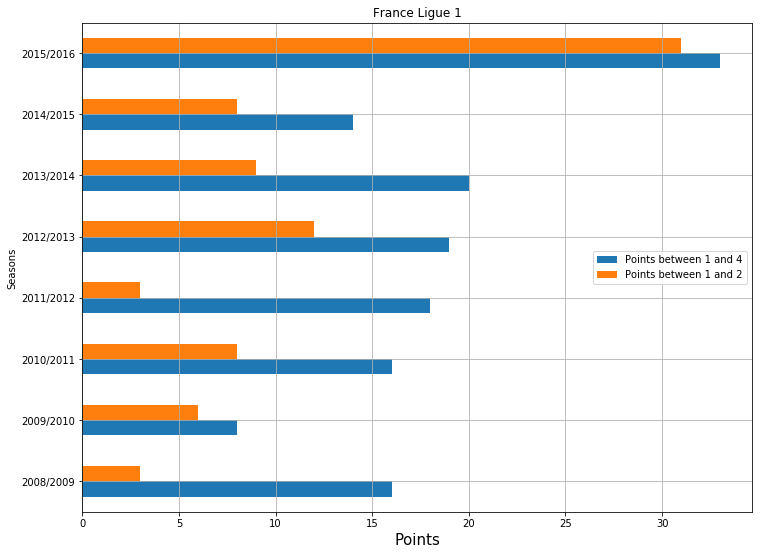

In [55]:
plot_bar(france_diff,'France Ligue 1')

The french league winner on average leads with 10 points on average, even though Psg won the league with 31 points in 2015/2016, the winner also gaps the 4th place with on average 18 points

**England Premier League**

In [56]:
# Get differences btw 1st & 2nd ,then that of 1st and 4th
england_12 = seasons_diff(1,2,"England Premier League")
england_14 = seasons_diff(1,4,"England Premier League")
england_diff  = england_14.merge(england_12, left_on='Season', right_on='Season', how='left').rename(columns={"Season": "Seasons"}).set_index('Seasons')
england_diff

,Points between 1 and 4,Points between 1 and 2
Seasons,,
2008/2009,18,4
2009/2010,16,1
2010/2011,12,9
2011/2012,20,0
2012/2013,16,11
2013/2014,7,2
2014/2015,17,8
2015/2016,15,10


In [57]:
# mean difference between 1st and second from 2008 - 2015 season
england_diff['Points between 1 and 2'].mean()

5.625

In [58]:
# mean difference between 1st and fourth from 2008 - 2015 season
england_diff['Points between 1 and 4'].mean()

15.125

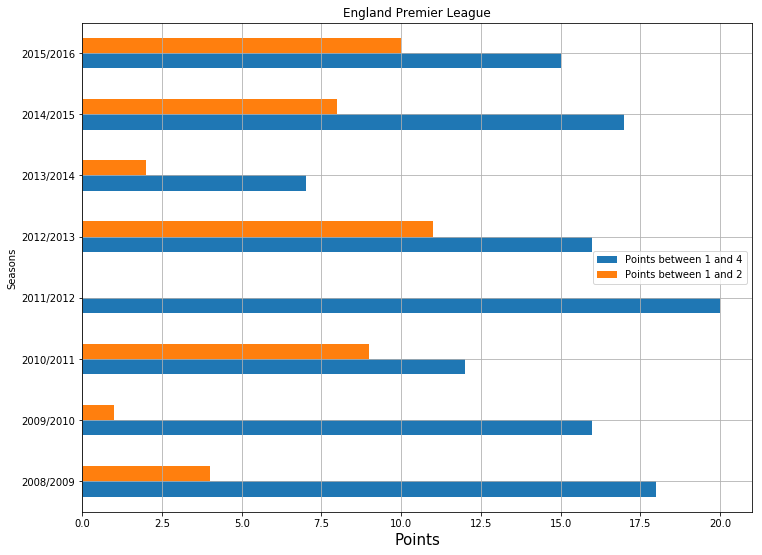

In [59]:
plot_bar(england_diff,'England Premier League')

England's champion on average leads with 5.6 points and gaps the the 4th place with 15 points on average, though in the 2011/12 season was decided by goal difference between the red and blue half of manchester

**Germany, Bundesliga**

In [60]:
# Get differences btw 1st & 2nd ,then that of 1st and 4th
german_12 = seasons_diff(1,2,"Germany 1. Bundesliga")
german_14 = seasons_diff(1,4,"Germany 1. Bundesliga")
german_diff  = german_14.merge(german_12, left_on='Season', right_on='Season', how='left').rename(columns={"Season": "Seasons"}).set_index('Seasons')
german_diff

,Points between 1 and 4,Points between 1 and 2
Seasons,,
2008/2009,6,2
2009/2010,11,5
2010/2011,15,7
2011/2012,21,8
2012/2013,36,25
2013/2014,29,19
2014/2015,18,10
2015/2016,33,10


In [61]:
# mean difference between 1st and second from 2008 - 2015 season
german_diff['Points between 1 and 2'].mean()

10.75

In [62]:
# mean difference between 1st and second from 2008 - 2015 season
german_diff['Points between 1 and 4'].mean()

21.125

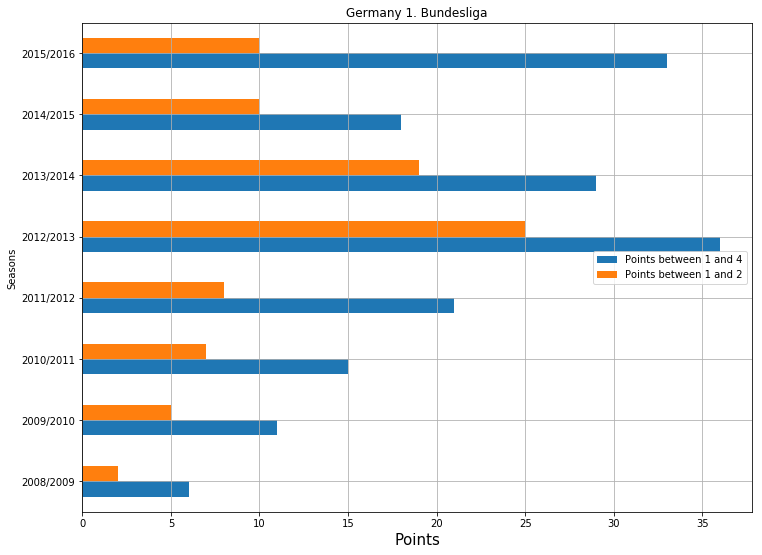

In [63]:
plot_bar(german_diff,'Germany 1. Bundesliga')

Bundesliga has on average a 10.8 difference between the top 2 and a 21 points difference between the eventual winner and the 4th position, the 2012/2013 season saw a 36 points difference between the first and fourth place

**Italy Serie A**

In [64]:
# Get differences btw 1st & 2nd ,then that of 1st and 4th
italy_12 = seasons_diff(1,2,"Italy Serie A")
italy_14 = seasons_diff(1,4,"Italy Serie A")
italy_diff  = italy_14.merge(italy_12, left_on='Season', right_on='Season', how='left').rename(columns={"Season": "Seasons"}).set_index('Seasons')
italy_diff

,Points between 1 and 4,Points between 1 and 2
Seasons,,
2008/2009,16,10
2009/2010,15,2
2010/2011,16,6
2011/2012,19,2
2012/2013,17,9
2013/2014,37,17
2014/2015,23,17
2015/2016,24,9


In [65]:
# mean difference between 1st and 2nd from 2008 - 2015 season
italy_diff['Points between 1 and 2'].mean()

9.0

In [66]:
# mean difference between 1st and 4th from 2008 - 2015 season
italy_diff['Points between 1 and 4'].mean()

20.875

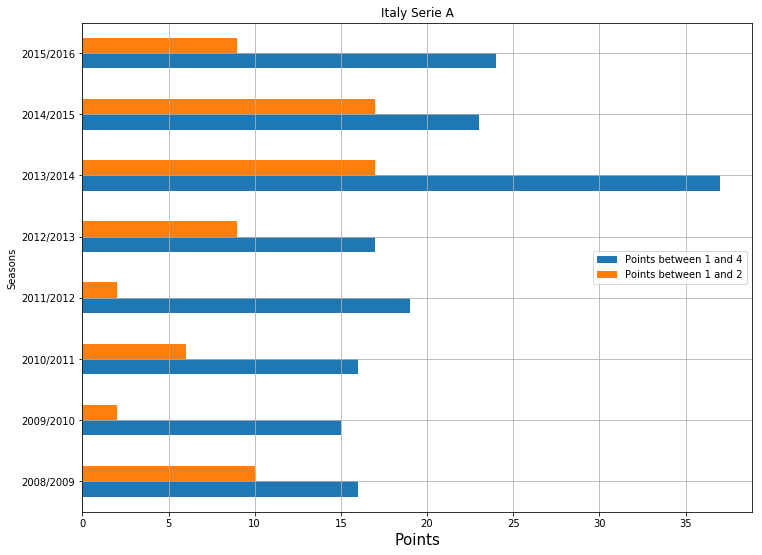

In [67]:
plot_bar(italy_diff,'Italy Serie A')

In the Italian Serie A, the winner takes the trophy having a 9 points lead on the second place on average and a 20.8 points lead over th fouth place on average, There was a 37 point gap in the 2013/2014 season between the eventual winners and 4th place	

**Spain LIGA BBVA**

In [68]:
# Get differences btw 1st & 2nd ,then that of 1st and 4th
spain_12 = seasons_diff(1,2,"Spain LIGA BBVA")
spain_14 = seasons_diff(1,4,"Spain LIGA BBVA")
spain_diff  = spain_14.merge(spain_12, left_on='Season', right_on='Season', how='left').rename(columns={"Season": "Seasons"}).set_index('Seasons')
spain_diff

,Points between 1 and 4,Points between 1 and 2
Seasons,,
2008/2009,20,9
2009/2010,36,3
2010/2011,34,4
2011/2012,42,9
2012/2013,34,15
2013/2014,20,3
2014/2015,17,2
2015/2016,27,1


In [69]:
# mean difference between 1st and 2nd from 2008 - 2015 season
spain_diff['Points between 1 and 2'].mean()

5.75

In [70]:
# mean difference between 1st and 4th from 2008 - 2015 season
spain_diff['Points between 1 and 4'].mean()

28.75

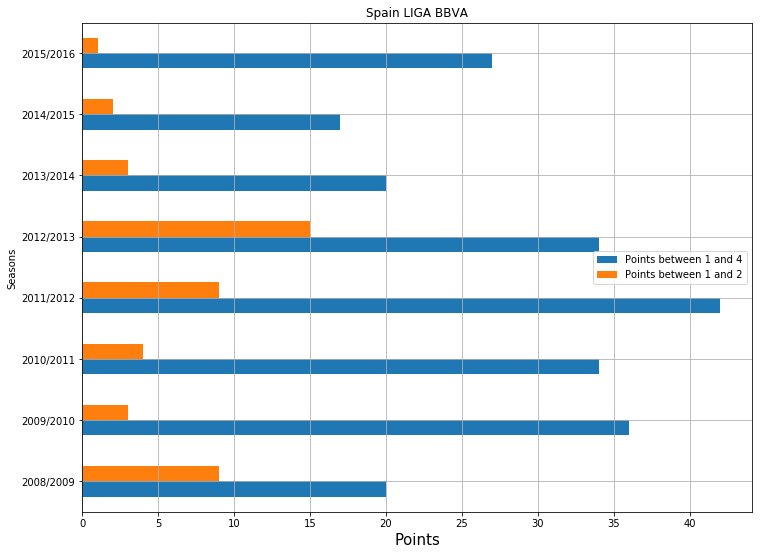

In [71]:
plot_bar(spain_diff,'Spain LIGA BBVA')

For Spain its usually tight between the top two teams with a 5.75 points difference on average, same can't be said about the 4th place , with the leader taking a 28.75 points gap over the 4th place, the 2011/2012 saw 42 points difference between 1st and 4th place, recording the highest difference in a season across the top five european leagues in the period 

**Different champoins in the last 8 years**

In [72]:
def diff_winners(league,season):
    '''league(string)- name of league
        season(string)- list containing seasons
        returns df containig number of different winners for given seasons
    '''
    winners = []
    for year in seasons:
        # make table
        df = make_table(league,year)
        # Get first place club
        champion = df['club'].loc[1]
        # Add to list
        winners.append(champion)
    
    # Number of unique winners
    winners_count = len(set(winners))
    # Make dataframe
    d = {'League': [league], 'Number of Different winners': [winners_count]}
    df = pd.DataFrame(data=d)
    return df
# List of seasons
seasons =['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013','2013/2014', '2014/2015', '2015/2016']


def diff_top4(league,season):
    '''league(string)- name of league
        season(string)- list containing seasons
        returns df containig number of different top 4 teams for given seasons
    '''
    top_4 = []
    for year in seasons:
        # make table
        df = make_table(league,year)
        # Get and append top 4 club
        top_4.append(df['club'].loc[1])
        top_4.append(df['club'].loc[2])
        top_4.append(df['club'].loc[3])
        top_4.append(df['club'].loc[4])
        
    
    #Number of unique top 4 members
    top_4_count = len(set(top_4))
    # Make dataframe
    d = {'League': [league], 'Number of Different top 4': [top_4_count]}
    df = pd.DataFrame(data=d)
    return df
# List of seasons
seasons =['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013','2013/2014', '2014/2015', '2015/2016']

In [73]:
germany = diff_winners('Germany 1. Bundesliga',seasons)
england = diff_winners('England Premier League',seasons)
spain = diff_winners('Spain LIGA BBVA',seasons)
france = diff_winners('France Ligue 1',seasons)
italy = diff_winners('Italy Serie A',seasons)
diff_champs = pd.concat([germany,england,spain,france,italy], ignore_index=True)
diff_champs

,League,Number of Different winners
0,Germany 1. Bundesliga,3
1,England Premier League,4
2,Spain LIGA BBVA,3
3,France Ligue 1,5
4,Italy Serie A,3


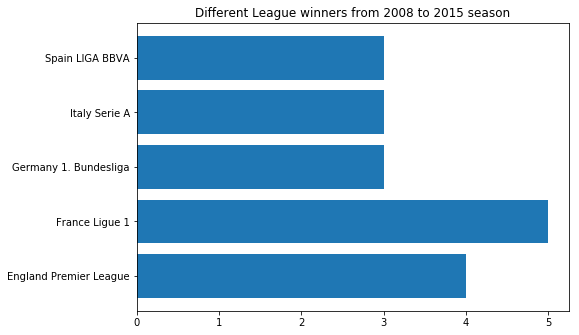

In [74]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(diff_champs['League'],diff_champs['Number of Different winners'])
ax.set(title = 'Different League winners from 2008 to 2015 season')
plt.show()

The French league has had five different winners during the period followed by the English premier league with four. 

In [75]:
germany = diff_top4('Germany 1. Bundesliga',seasons)
england = diff_top4('England Premier League',seasons)
spain = diff_top4('Spain LIGA BBVA',seasons)
france = diff_top4('France Ligue 1',seasons)
italy = diff_top4('Italy Serie A',seasons)
diff_top4 = pd.concat([germany,england,spain,france,italy], ignore_index=True)
diff_top4

,League,Number of Different top 4
0,Germany 1. Bundesliga,10
1,England Premier League,7
2,Spain LIGA BBVA,9
3,France Ligue 1,11
4,Italy Serie A,10


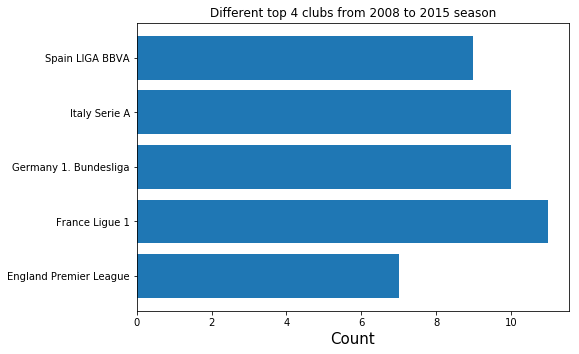

In [76]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(diff_top4['League'],diff_top4['Number of Different top 4'])
#title
ax.set(title = 'Different top 4 clubs from 2008 to 2015 season')
# on x axis
ax.set_xlabel('Count', color = 'black', fontsize = '15')
plt.show()

The French Ligue 1 had eleven different in it's top four positions from 2008 to 2015, while the Bundesliga and Serie A had ten each, the English premier league had 7 different clubs alluding to the big 6 clubs who normally dominate the league in the past decade

<a id='conclusions'></a>
## Conclusions

**Conclusions**

>At the end of this interesting data analysis. I discovered some unexpected facts about the football teams and leagues. Here are some of the insights I ganered:

>Between a Home win, draw and an away win, the most frequent occurence in this dataset is a home win 45.87% , followed by an away win 28.7, and finally the least frequent is a draw with 25.39%

>Fc Barcelona of Spain had the most wins during the period with 234 wins, closely followed by their la liga rivals Real Madrid with 228 wins


>The Eredivisie has the highest number of goals per game with 3.08 goals on average over 2448 games, followed by the Switzerland Super League with 2.9 goals on average in 1422 games


>SV Werder Bremen(Bundesliga) Conceeded 471 goals over the period followed by ADO Den Haag(Eredivisie) who conceeded 468 goals in the period

>The English Premier league and The French ligue 1 seems to be the most competitive of the top five european league, with 4 and 5 different winners respectively between 2008 and 2015, ligue 1 also had 11 different teams making the top 4 places, while the Epl has a 5.6 point gap on average between the top two teams, with the 2011/12 season decided by goal difference between the red and blue half of Manchester. 









**Limitations:**

>This analysis was done considering the points, league winners and top 4 teams to decide which league was the most competitive, however other metrics could have been used 

>The matches dataset only contains values from the 2008 to 2015 season, an updated data will be needed for a more current analysis



In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0